<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/PDSH-cover-small.png?raw=1">

*This notebook contains an excerpt from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas.*

# Analítica Avanzada de Datos.
---

## Regresión Lineal

En esta sección comenzaremos con un rápido paseo intuitivo por las matemáticas que subyacen a este conocido problema, antes de ver cómo pueden generalizarse los modelos lineales para dar cuenta de patrones más complicados en los datos.

Comenzamos con las importaciones estándar:

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

## Regresión Lineal Simple

Empezaremos con la regresión lineal más conocida, una linea:
$$
y = ax + b
$$
donde $a$ es comunmente conocida como la *pendiente*, y $b$ se conoce como la  *intercepción*.

Considere los siguientes datos, que están dispersos alrededor de una recta con pendiente 2 e intercepto -5:

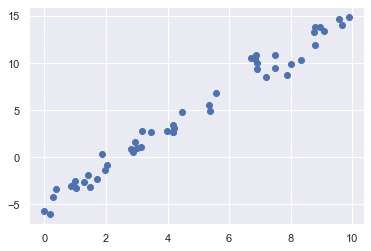

In [3]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y);

Podemos utilizar el estimador ``LinearRegression`` de Scikit-Learn para ajustar estos datos y construir la línea de mejor ajuste:

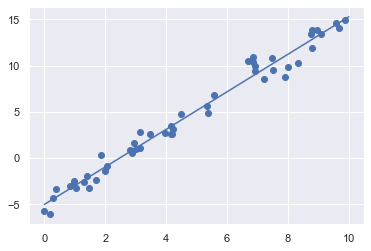

In [4]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

The slope and intercept of the data are contained in the model's fit parameters, which in Scikit-Learn are always marked by a trailing underscore.
Here the relevant parameters are ``coef_`` and ``intercept_``:

In [5]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     2.027208810360696
Model intercept: -4.9985770855532055


Vemos que los resultados se acercan mucho a las entradas, como se esperaba

Sin embargo, el estimador ``LinearRegression`` es mucho más capaz que esto: además de los ajustes lineales simples, también puede manejar modelos lineales multidimensionales de la forma

$$
y = a_0 + a_1 x_1 + a_2 x_2 + \cdots
$$

donde hay valores múltiples $x$.
Geométricamente, esto es similar a ajustar un plano a puntos en tres dimensiones, o ajustar un hiperplano a puntos en dimensiones superiores.

La naturaleza multidimensional de estas regresiones hace que sean más difíciles de visualizar, pero podemos ver uno de estos ajustes en acción mediante la construcción de algunos datos de ejemplo, utilizando el operador de multiplicación de matrices de *NumPy*:

In [6]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])

model.fit(X, y)
print(model.intercept_)
print(model.coef_)

0.50000000000001
[ 1.5 -2.   1. ]


Aquí los $y$ se construyen a partir de tres valores aleatorios $𝑥$ y la regresión lineal recupera los coeficientes utilizados para construir los datos.

De esta manera, podemos utilizar el estimador único ``LinearRegression`` para ajustar líneas, planos o hiperplanos a nuestros datos. Todavía parece que este enfoque se limitaría a relaciones estrictamente lineales entre variables, pero resulta que podemos relajar esto también.

## Regresión de la función de base

Un truco que se puede utilizar para adaptar la regresión lineal a las relaciones no lineales entre variables es transformar los datos según *funciones base*.

Utilizando ``PolynomialRegression``. La idea es tomar nuestro modelo lineal multidimensional:
$$
y = a_0 + a_1 x_1 + a_2 x_2 + a_3 x_3 + \cdots
$$
y construir los $x_1, x_2, x_3,$ y así sucesivamente, a partir de nuestra entrada unidimensional $x$.
Es decir, sea $x_n = f_n(x)$, donde $f_n()$ es una función que transforma nuestros datos.

Por ejemplo, si $f_n(x) = x^n$, nuestro modelo se convierte en una regresión polinómica:
$$
y = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + \cdots
$$
Observe que éste es *todavia un modelo lineal* - la linealidad se refiere al hecho de que los coeficientes $a_n$ nunca se multiplican ni se dividen entre sí.

Lo que hemos hecho efectivamente es tomar nuestros valores unidimensionales $x$ y proyectarlos a una dimensión superir, de modo que un ajuste lineal puede ajustarse a relaciones más complicadas entre $x$ e $y$.

### Funciones de base polinómica

Esta proyección polinómica es lo suficientemente útil como para incorporarla a Scikit-Learn mediante el transformador ``PolynomialFeatures``:

In [7]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

Aquí vemos que el transformador ha convertido nuestra matriz unidimensional en una matriz tridimensional tomando el exponente de cada valor. Esta nueva representación de datos de mayor dimensión puede introducirse en una regresión lineal.

La forma más limpia de conseguirlo es utilizar una canalización. Hagamos un modelo polinómico de 7º grado de esta manera:

In [8]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7),
                           LinearRegression())

Con esta transformación en su lugar, podemos utilizar el modelo lineal para ajustar relaciones mucho más complicadas entre $𝑥$
  y $𝑦$. Por ejemplo, aquí tenemos una onda sinusoidal con ruido:

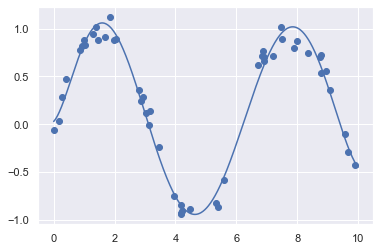

In [9]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

Nuestro modelo lineal, mediante el uso de funciones de base polinómicas de 7º orden, puede proporcionar un ajuste excelente a estos datos no lineales.

### Funciones de base gaussianas

Por supuesto, son posibles otras funciones de base. Por ejemplo, un patrón útil es ajustar un modelo que no sea una suma de bases polinómicas, sino una suma de bases gaussianas. El resultado podría parecerse a la siguiente figura:

![](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/05.06-gaussian-basis.png?raw=1)
[figure source in Appendix](#Gaussian-Basis)

Las regiones sombreadas en el gráfico son las funciones de base escaladas, y cuando se suman reproducen la curva suave a través de los datos. Estas funciones de base gaussiana no están integradas en Scikit-Learn, pero podemos escribir un transformador personalizado que las cree, como se muestra aquí y se ilustra en la siguiente figura (los transformadores de Scikit-Learn se implementan como clases de Python; leer el código fuente de Scikit-Learn es una buena manera de ver cómo se pueden crear):

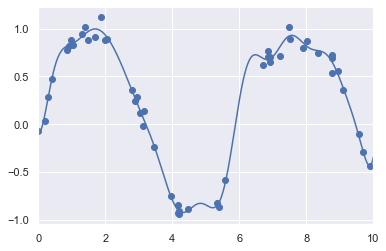

In [10]:
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Uniformly spaced Gaussian features for one-dimensional input"""
    
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
    
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
        
    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
        
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,
                                 self.width_, axis=1)
    
gauss_model = make_pipeline(GaussianFeatures(20),
                            LinearRegression())
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 10);

Ponemos este ejemplo aquí sólo para dejar claro que no hay nada mágico en las funciones de base polinómica: si tienes algún tipo de intuición sobre el proceso de generación de tus datos que te haga pensar que una base u otra podría ser apropiada, también puedes utilizarlas.

## Regularización

La introducción de funciones de base en nuestra regresión lineal hace que el modelo sea mucho más flexible, pero también puede llevar rápidamente a un ajuste excesivo.

Por ejemplo, si elegimos demasiadas funciones de base gaussianas, los resultados no serán tan buenos:

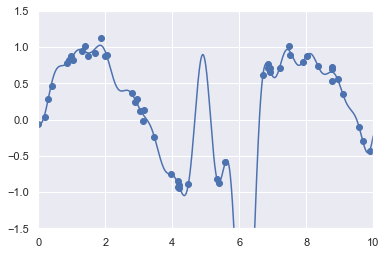

In [11]:
model = make_pipeline(GaussianFeatures(30),
                      LinearRegression())
model.fit(x[:, np.newaxis], y)

plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))

plt.xlim(0, 10)
plt.ylim(-1.5, 1.5);

Con los datos proyectados a la base de 30 dimensiones, el modelo tiene demasiada flexibilidad y llega a valores extremos entre las ubicaciones en las que está limitado por los datos. Podemos ver la razón de esto si trazamos los coeficientes de las bases gaussianas con respecto a sus ubicaciones:

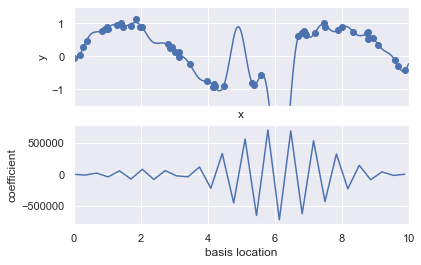

In [12]:
def basis_plot(model, title=None):
    fig, ax = plt.subplots(2, sharex=True)
    model.fit(x[:, np.newaxis], y)
    ax[0].scatter(x, y)
    ax[0].plot(xfit, model.predict(xfit[:, np.newaxis]))
    ax[0].set(xlabel='x', ylabel='y', ylim=(-1.5, 1.5))
    
    if title:
        ax[0].set_title(title)

    ax[1].plot(model.steps[0][1].centers_,
               model.steps[1][1].coef_)
    ax[1].set(xlabel='basis location',
              ylabel='coefficient',
              xlim=(0, 10))
    
model = make_pipeline(GaussianFeatures(30), LinearRegression())
basis_plot(model)

El panel inferior de esta figura muestra la amplitud de la función base en cada posición. Se trata del típico comportamiento de sobreajuste (overfitting) cuando las funciones base se solapan: los coeficientes de las funciones base adyacentes explotan y se anulan mutuamente. Sabemos que ese comportamiento es problemático, y estaría bien poder limitar esos picos de forma explosiva en el modelo penalizando los valores grandes de los parámetros del modelo. Este tipo de penalización se conoce como *regularización* y puede adoptar varias formas.

### Regresión de Cresta  (Regularización $L_2$ )

Quizás la forma más común de regularización se conoce como *regresión de cresta* o *regularización* $L_2$, a veces tambien llamada *regularización Tikhonov*.
Se procede penalizando la suma de cuadrados (2-norms) de los coeficientes del modelo; en este caso, la penalización sobre el ajuste del modelo sería
$$
P = \alpha\sum_{n=1}^N \theta_n^2
$$
donde $\alpha$ es un parámetro libre que controla la intensidad de la penalización. 
Este tipo de modelo penalizado está integrado en Scikit-Learn con el estimador  ``Ridge``:

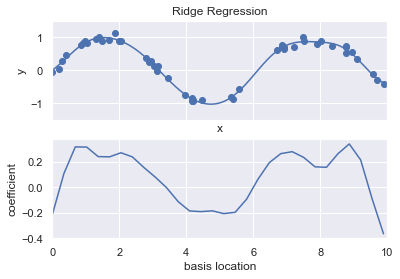

In [13]:
from sklearn.linear_model import Ridge
model = make_pipeline(GaussianFeatures(30), Ridge(alpha=0.1))
basis_plot(model, title='Ridge Regression')

El parámetro $\alpha$ es esencialmente un mando que controla la complejidad del modelo resultante. En el límite $\alpha \to 0$, recuperamos el resultado estándar de regresión lineal; en el límite $\alpha \to \infty$,se suprimirán todas las respuestas del modelo. Una ventaja de la regresión de cresta en particular es que puede calcularse muy eficientemente, con un coste computacional apenas superior al del modelo de regresión lineal original.

### Regresión Lasso ( regularización $L_1$)

Otro tipo de regularización muy común se conoce como lasso, y consiste en penalizar la suma de valores absolutos (1-normas) de los coeficientes de regresión:
$$
P = \alpha\sum_{n=1}^N |\theta_n|
$$

Aunque conceptualmente es muy similar a la regresión de cresta (ridge), los resultados pueden diferir sorprendentemente: por ejemplo, debido a razones geométricas, la regresión lasso tiende a favorecer *los modelos dispersos* cuando es posible: es decir, establece preferentemente los coeficientes del modelo exactamente en cero.

Podemos ver este comportamiento al duplicar la figura de la regresión de cresta, pero utilizando coeficientes normalizados con L1:

C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.136e-03, tolerance: 2.065e-03
  model = cd_fast.enet_coordinate_descent(


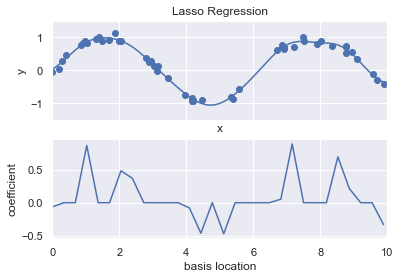

In [16]:
from sklearn.linear_model import Lasso
model = make_pipeline(GaussianFeatures(30), Lasso(alpha=0.001))
basis_plot(model, title='Lasso Regression')

Con la penalización de regresión lasso, la mayoría de los coeficientes son exactamente cero, y el comportamiento funcional se modela mediante un pequeño subconjunto de las funciones de base disponibles. Al igual que con la regularización de cresta, el parámetro $α$ ajusta la fuerza de la penalización y debe determinarse, por ejemplo, mediante validación cruzada.